# Week 6<br>Web Scraping

Oct 11, 2021

## Housekeeping

- Homework #3 (required) due a week from today (10/18)
- Homework #4 will be assigned next week
- You must complete one of homeworks #4, #5, and #6
- Final project due at the end of the final period...more details soon

## The roadmap

- Last time: APIs, Census data, Twitter
- Today: web scraping
- Next: big data, geo data science in the wild, machine learning, interactive web maps, dashboarding & web servers

The final project will ask you to combine several of these topics/techniques to analyze a data sets and produce a web-based data visualization

## Today: web scraping

- Why web scraping? 
- Getting familiar with the Web
- Web scraping: extracting data from static sites
- How to deal with dynamic content

In [2]:
# Start with the usual imports
# We'll use these throughout
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## What is web scraping? 


Using software to gather and extract data/content from websites

## Why is web scraping useful? 

- Not every data source provides an API
- The Web contains **a lot** of information
- Unique data sources that may not be available elsewhere

## What is possible: 11 million rental listings from Craigslist


<center>
<img src=attachment:01-craigslist-rental-housing-listings-us-map.jpg width=700></img>
</center>

[Source: Geoff Boeing](https://geoffboeing.com/2016/08/craigslist-rental-housing-insights/)
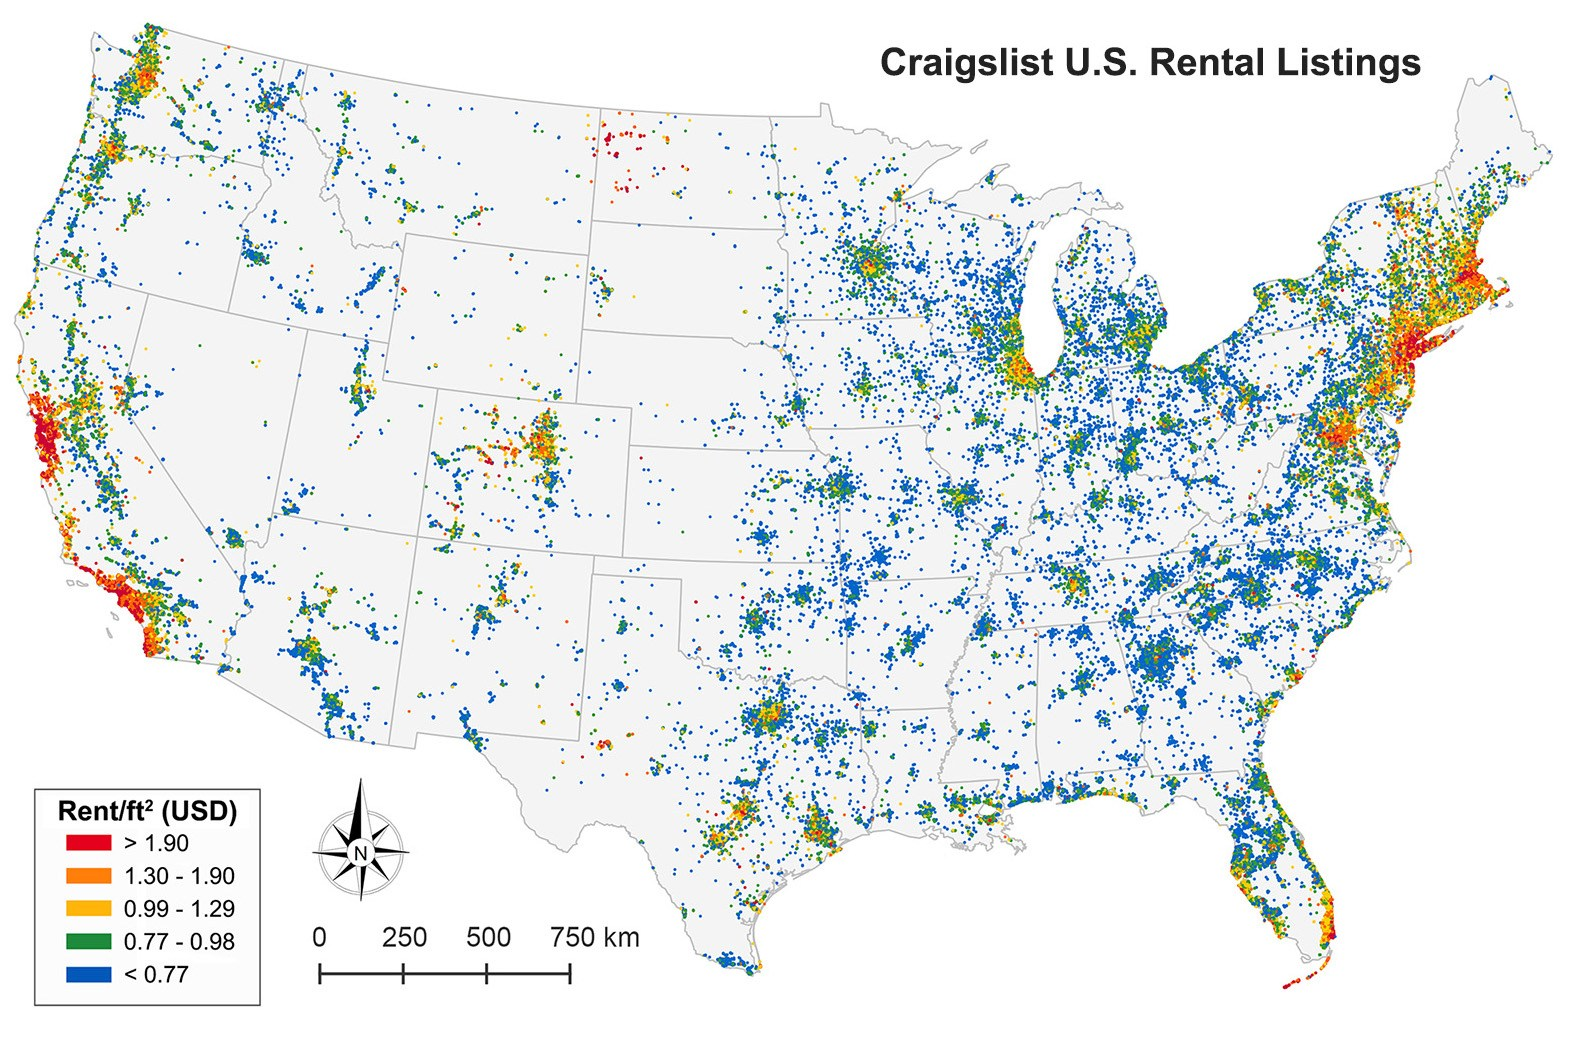

## Why isn't web scraping incredibly popular?

- It can be time consuming and difficult to extract large volumes 
- You are at the mercy of website maintainers — if the website structure changes, your code breaks
- Most importantly, there are ethical and legal concerns

<center>
    <img src=attachment:Screen%20Shot%202019-03-12%20at%208.42.41%20PM.png width=700></img>
</center>
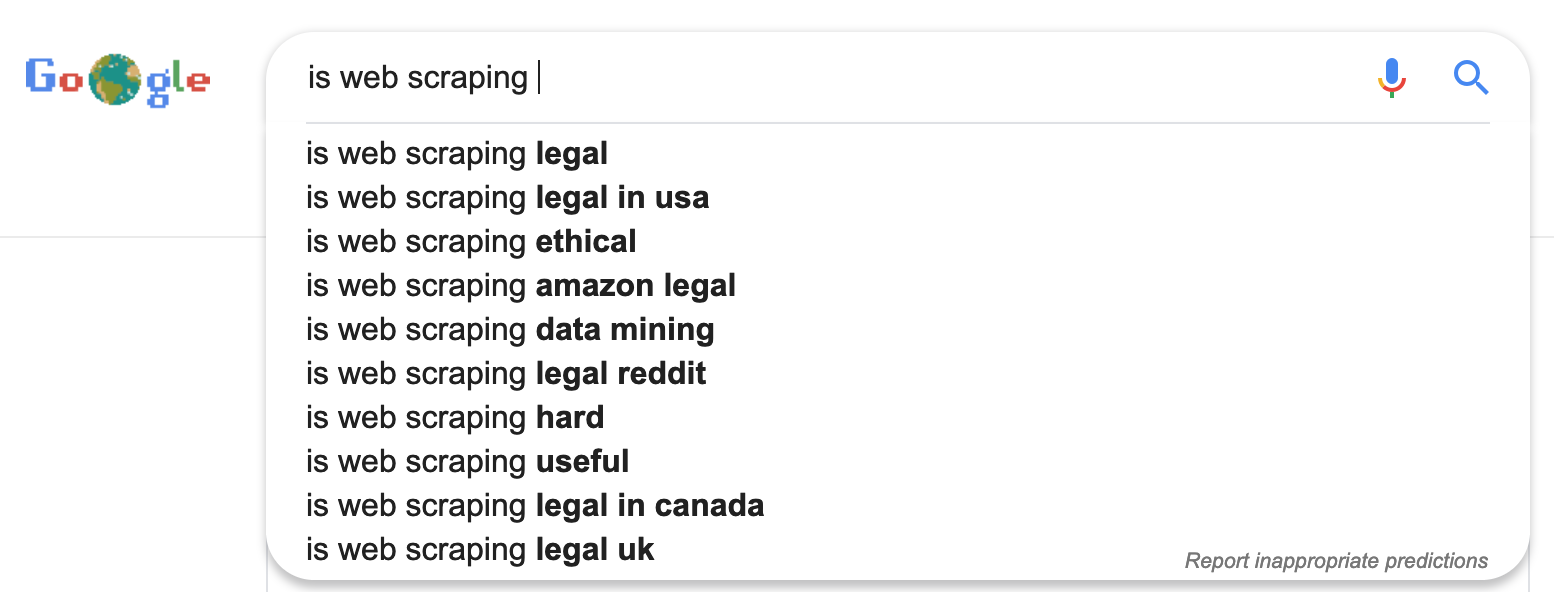

## Legal concerns

RadPad scraped the entirety of Craiglist, Craigslist sued RadPad, and they were [awarded $60 million](http://labusinessjournal.com/news/2017/apr/14/radpad-ordered-pay-605-million-judgment-craigslist/)

<center>
<img src=attachment:Picture1.png width=500></img>
</center>
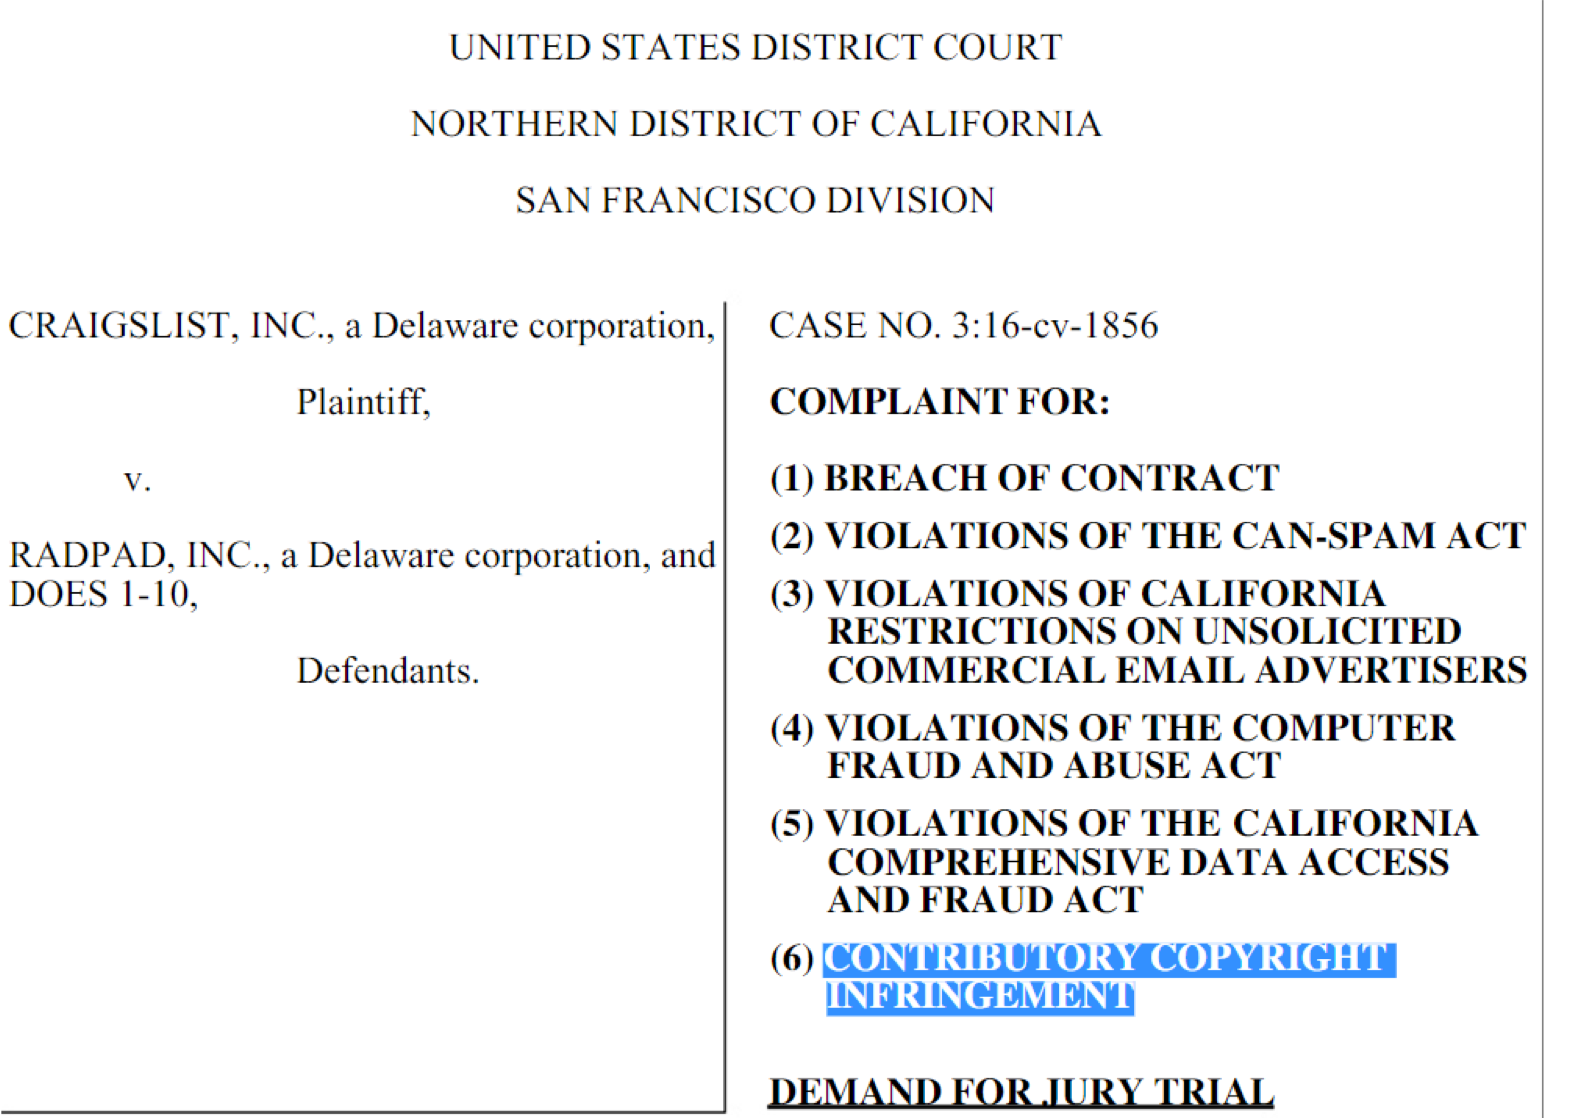

## Two types of legal issues

1. Copyright infringement
    - For example: pictures, rental listing text
2. Terms of Use violations
    - **Unauthorized**: Is scraping prohibited in the website’s terms of use?
    - **Intentional**: Was the person aware of the terms? Did they check an “I agree to these terms” box?
    - **Causes damage**: Did the scraping overload the website, blocking user access?


## When is web scraping probably okay?

- .gov sites and, to a lesser degree, .edu sites
- Website owner has no business reason to protect the information
- Not prohibited in terms of use
- Limited number of requests
- Not too many requests all at once
- Done at night, when web traffic is low


## When is it less likely to be okay?

- search engines
- E-commerce sites (e.g. Zillow, Expedia, Amazon)
- Social media
- Prohibited in terms of use
- Large number of requests
- High frequency of requests

## With that being said, let's do some web scraping

## A primer on Web definitions

So many acronyms:

- HTML
- The DOM
- CSS

## HTML: HyperText Markup Language

- The language most websites are written in
- The browser knows how to read this language and renders the output for you
- HTML is what a web crawler will see

## HTML tags

- There are a standard set of tags to define the different structural components of a webpage
- For example: 
    - `<h1>`, `<h2>` tags define headers
    - `<p>` tags define paragraphs
    - `<ol>` and `<ul>` are ordered and unordered lists

## Jupyter notebooks can render HTML

Use the `%%html` magic cell command

In [3]:
%%html

<html>
  <head>
    <title>TITLE GOES HERE</title>
  </head>
  <body>
    <h1>MAIN CONTENT GOES IN THE BODY TAG</h1>
    <p>This is a paragraph tag</p>
    <p>This is a second paragraph tag</p>
  </body>
</html>

## HTML: elements, tags, and attributes

Learning the notation:

In [4]:
%%html

<a id="my-link" style="color: orange;" href="https://www.design.upenn.edu" target="blank_">This is my link</a>

**The element:** 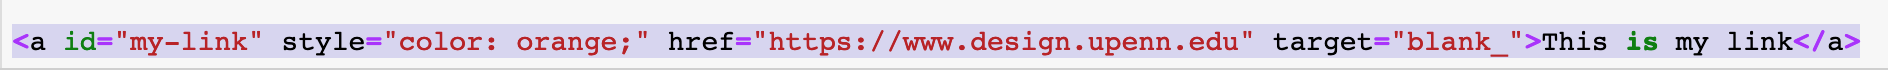

**The tag:**
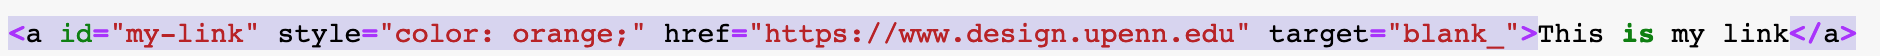

**The attributes:**

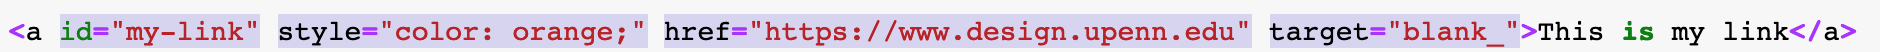

## Some attributes have special meaning

- In particular: `id` and `class`
- Allows you to: 
    - select and manipulate specific elements
    - apply styling to specific types of elements

## CSS: Cascading Stylesheets

- A language for styling HTML pages
- CSS styles (also known as selectors) are applied to HTML tags based on their name, class, or ID.

<center>
    <img src=attachment:Screen%20Shot%202019-03-12%20at%209.30.19%20PM.png width=1200></img>
</center>
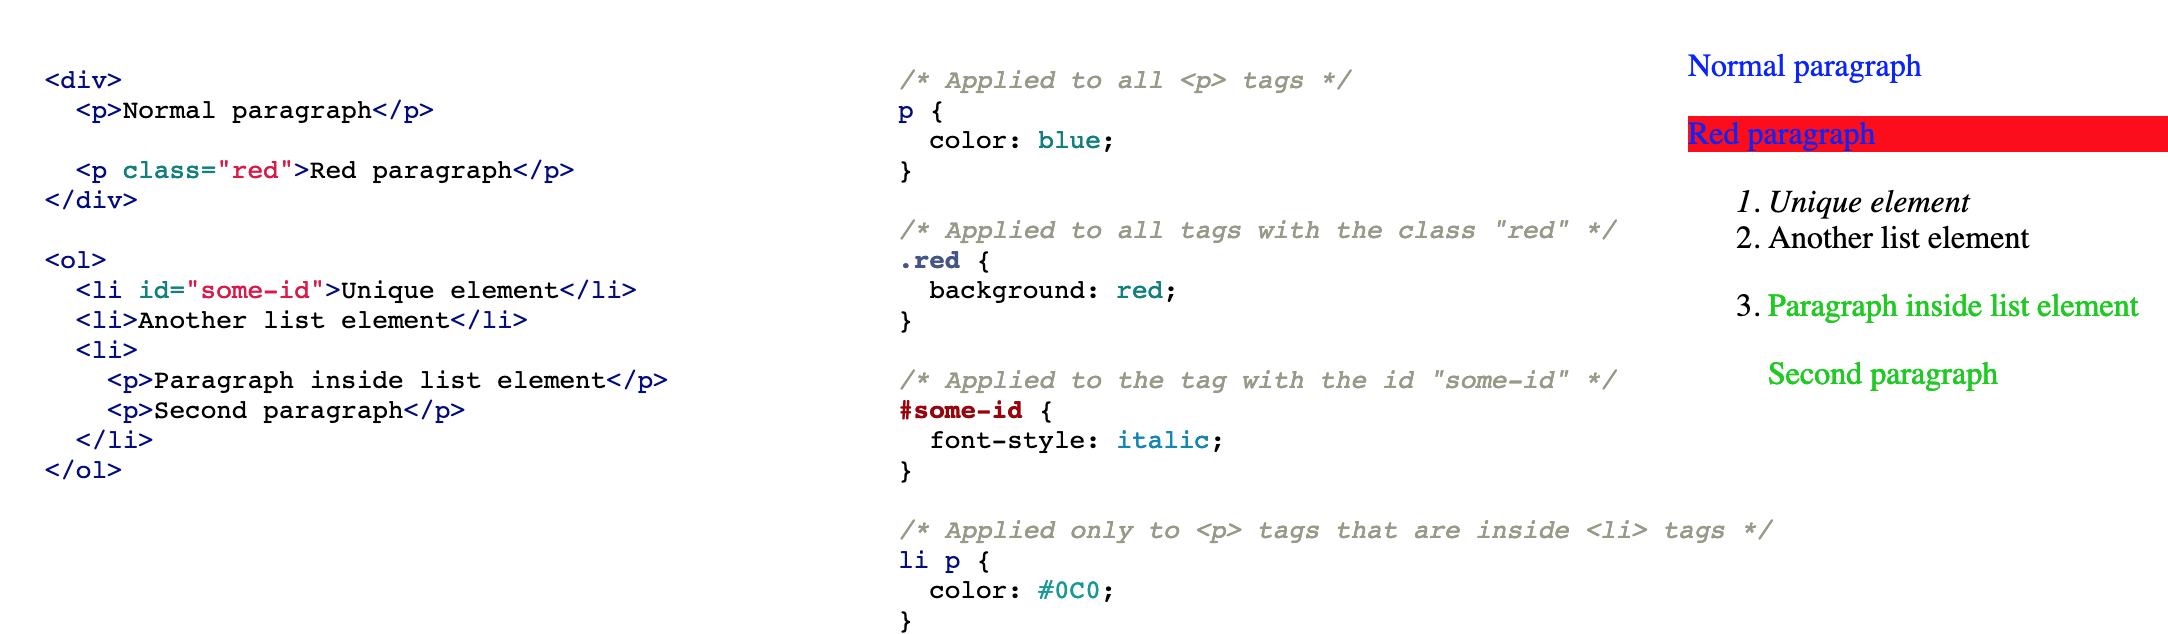

## Basic Web selectors

- Class
    - e.g., `.red`
- ID
    - e.g., `#some-id`
- Tag
    - e.g., `p`, `li`, `div`

- **IDs:** unique identifiers
    - no two elements on a page will have the same ID.
- **Classes:** not unique
    - many elements will have the same class
    - a single element can have multiple classes

And many more: look up the syntax when you need it

https://www.w3schools.com/cssref/css_selectors.asp

## Finally: dynamic content

## The DOM: Document Object Model

- An interactive object tree created from the HTML tag hierarchy on a page
- Created by the browser
- Tracks user interactions
- It is **dynamic**: stores the current state of the webpage 

## Step 1: Inspecting a webpage

- Modern web browsers provide tools for inspecting the source HTML and DOM of websites
- Also tells you data sources that have been loaded by the page
- This should also be your first step when starting to scrape a page

**Simply hit F12 to load the Web Inspector**

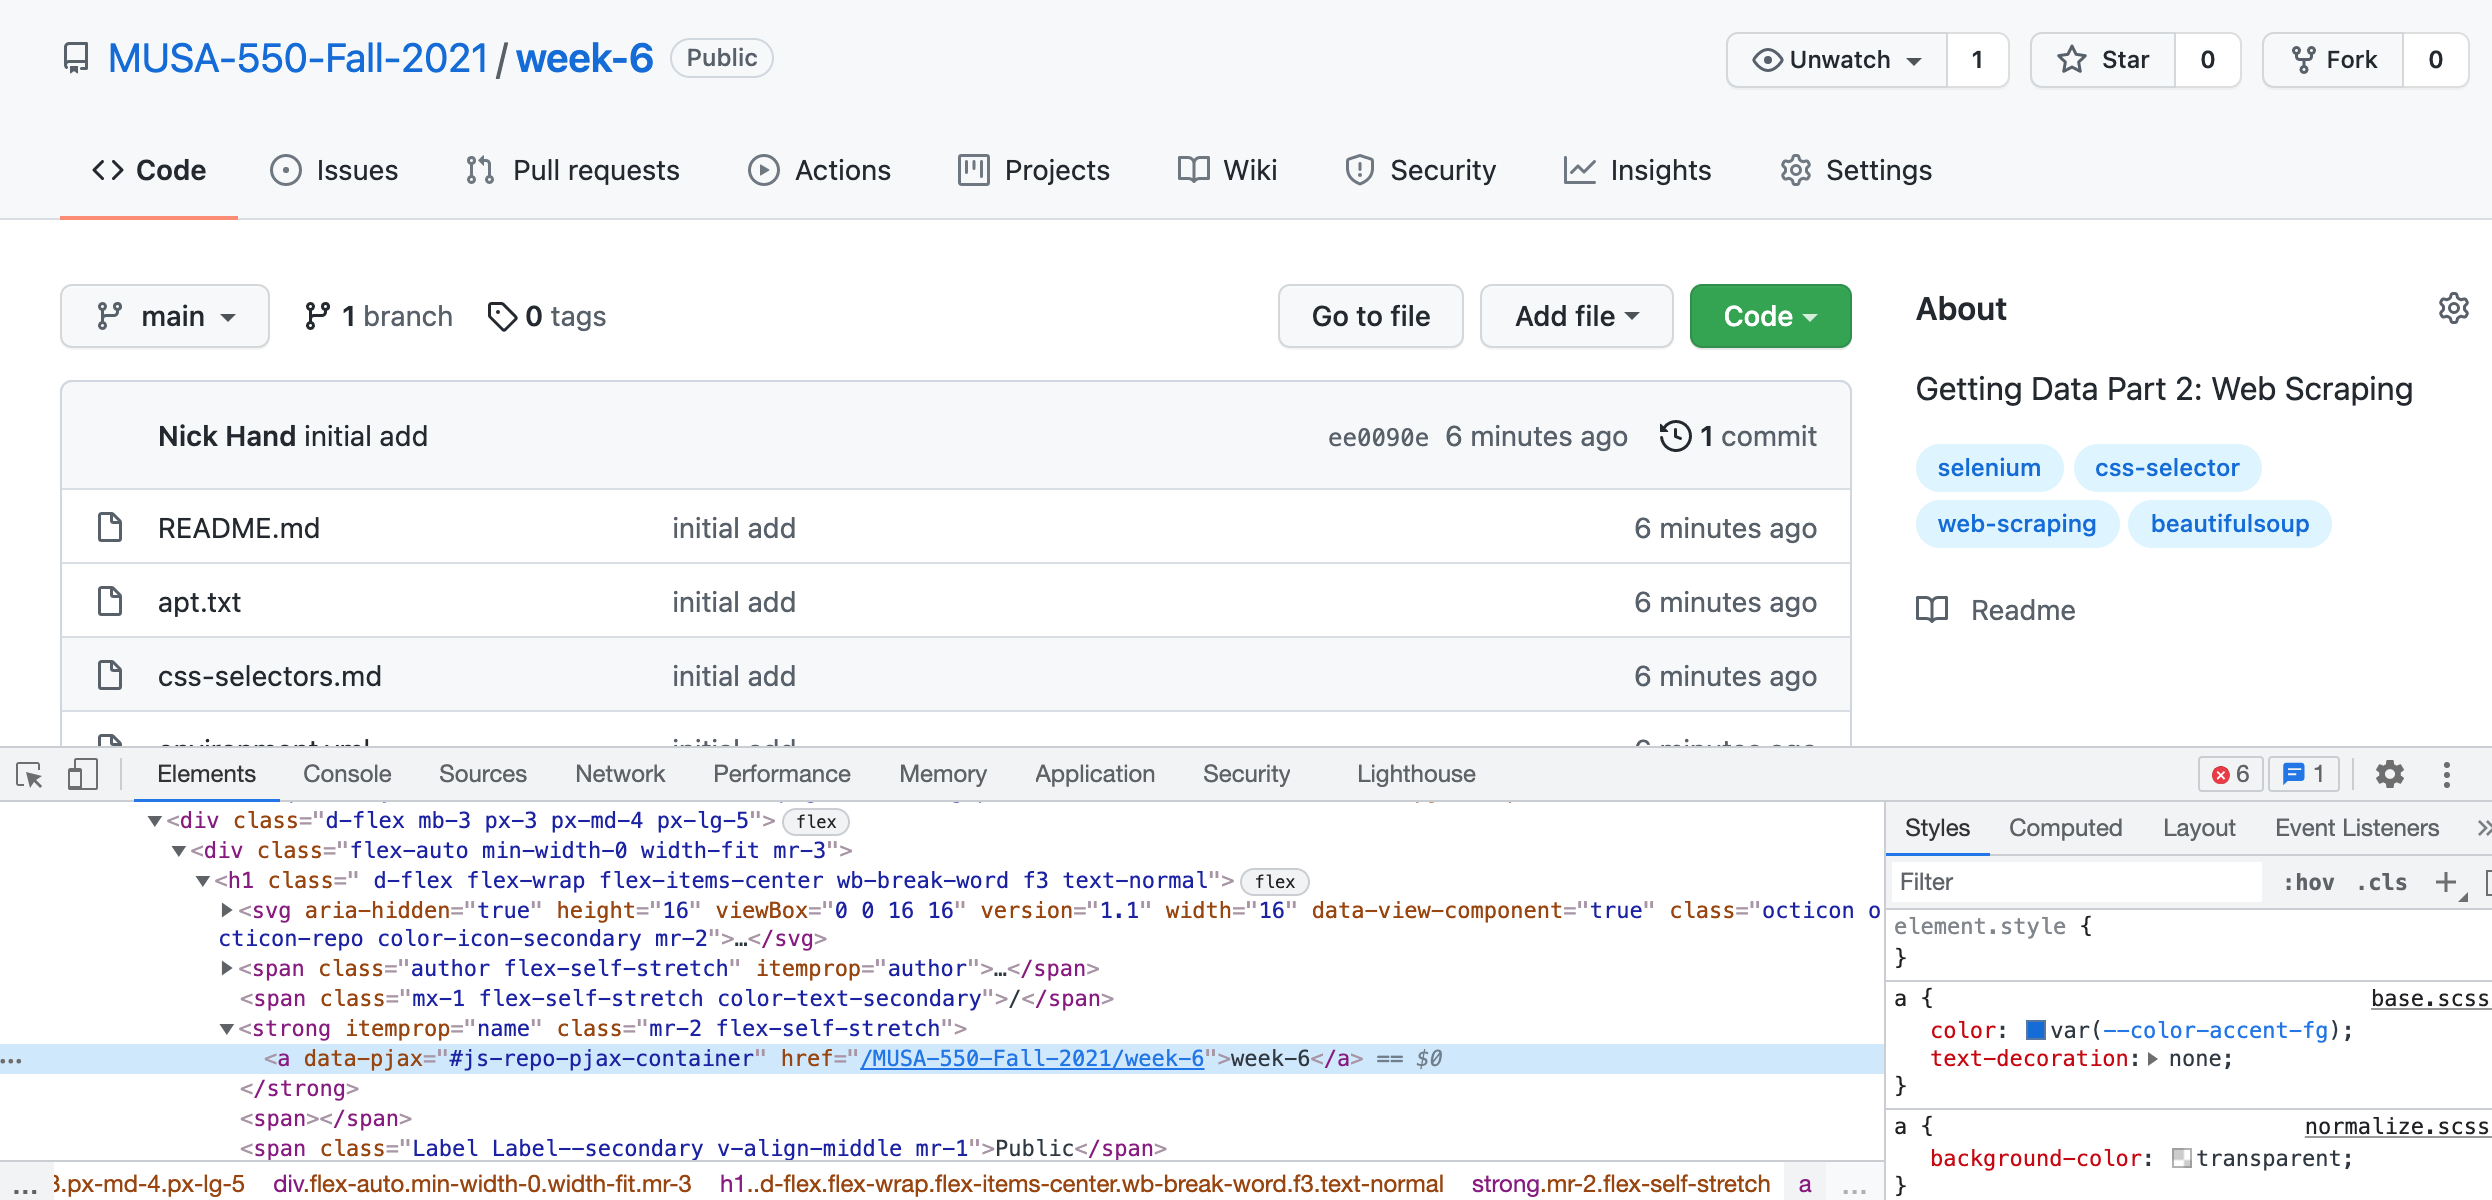

## The Elements tab

- Allows you to inspect the DOM directly
- The tool that will allow you to identify what data you want to scrape from a website

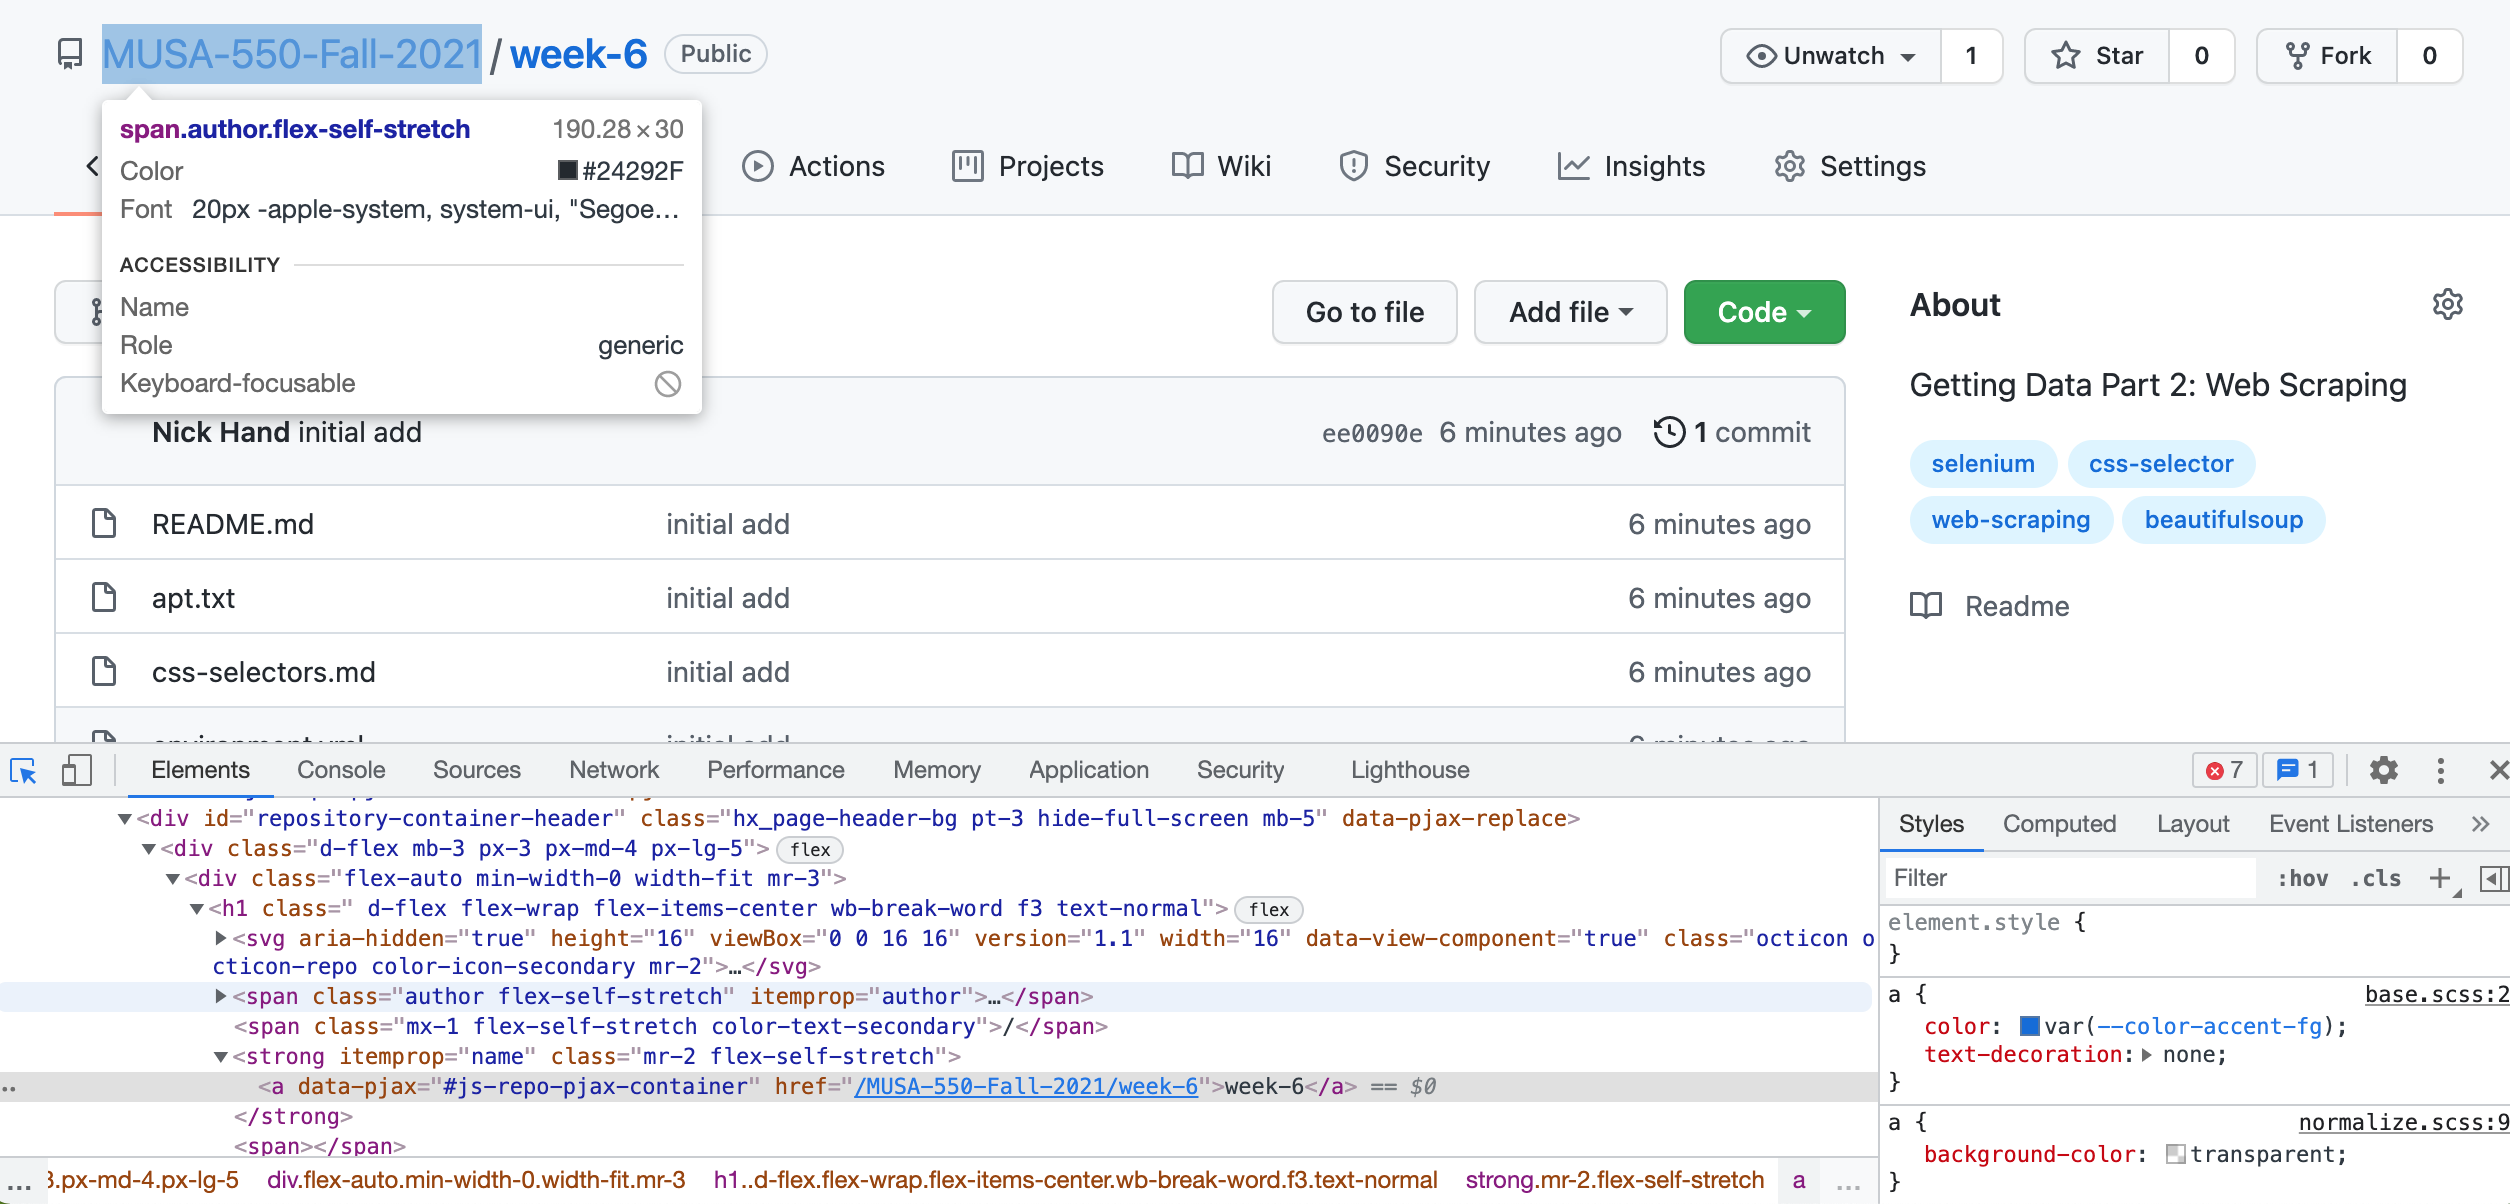

## The Elements tab

1. Right click on the element you want to view
2. Click on "Inspect"
3. The element will be highlighted in the DOM (in the Elements tab)

## The Network Tab

- Shows you all files downloaded by the webpage after the HTML loaded (FYI: these are called AJAX requests)
- Select either `JS` or `XHR` (XML HTTP requests)

**Usually looking for `.json` files for GeoJSON data**

## Example 1: [The Prisons Census in Philadelphia](https://www.phila.gov/departments/philadelphia-department-of-prisons/daily-headcount-and-census/)

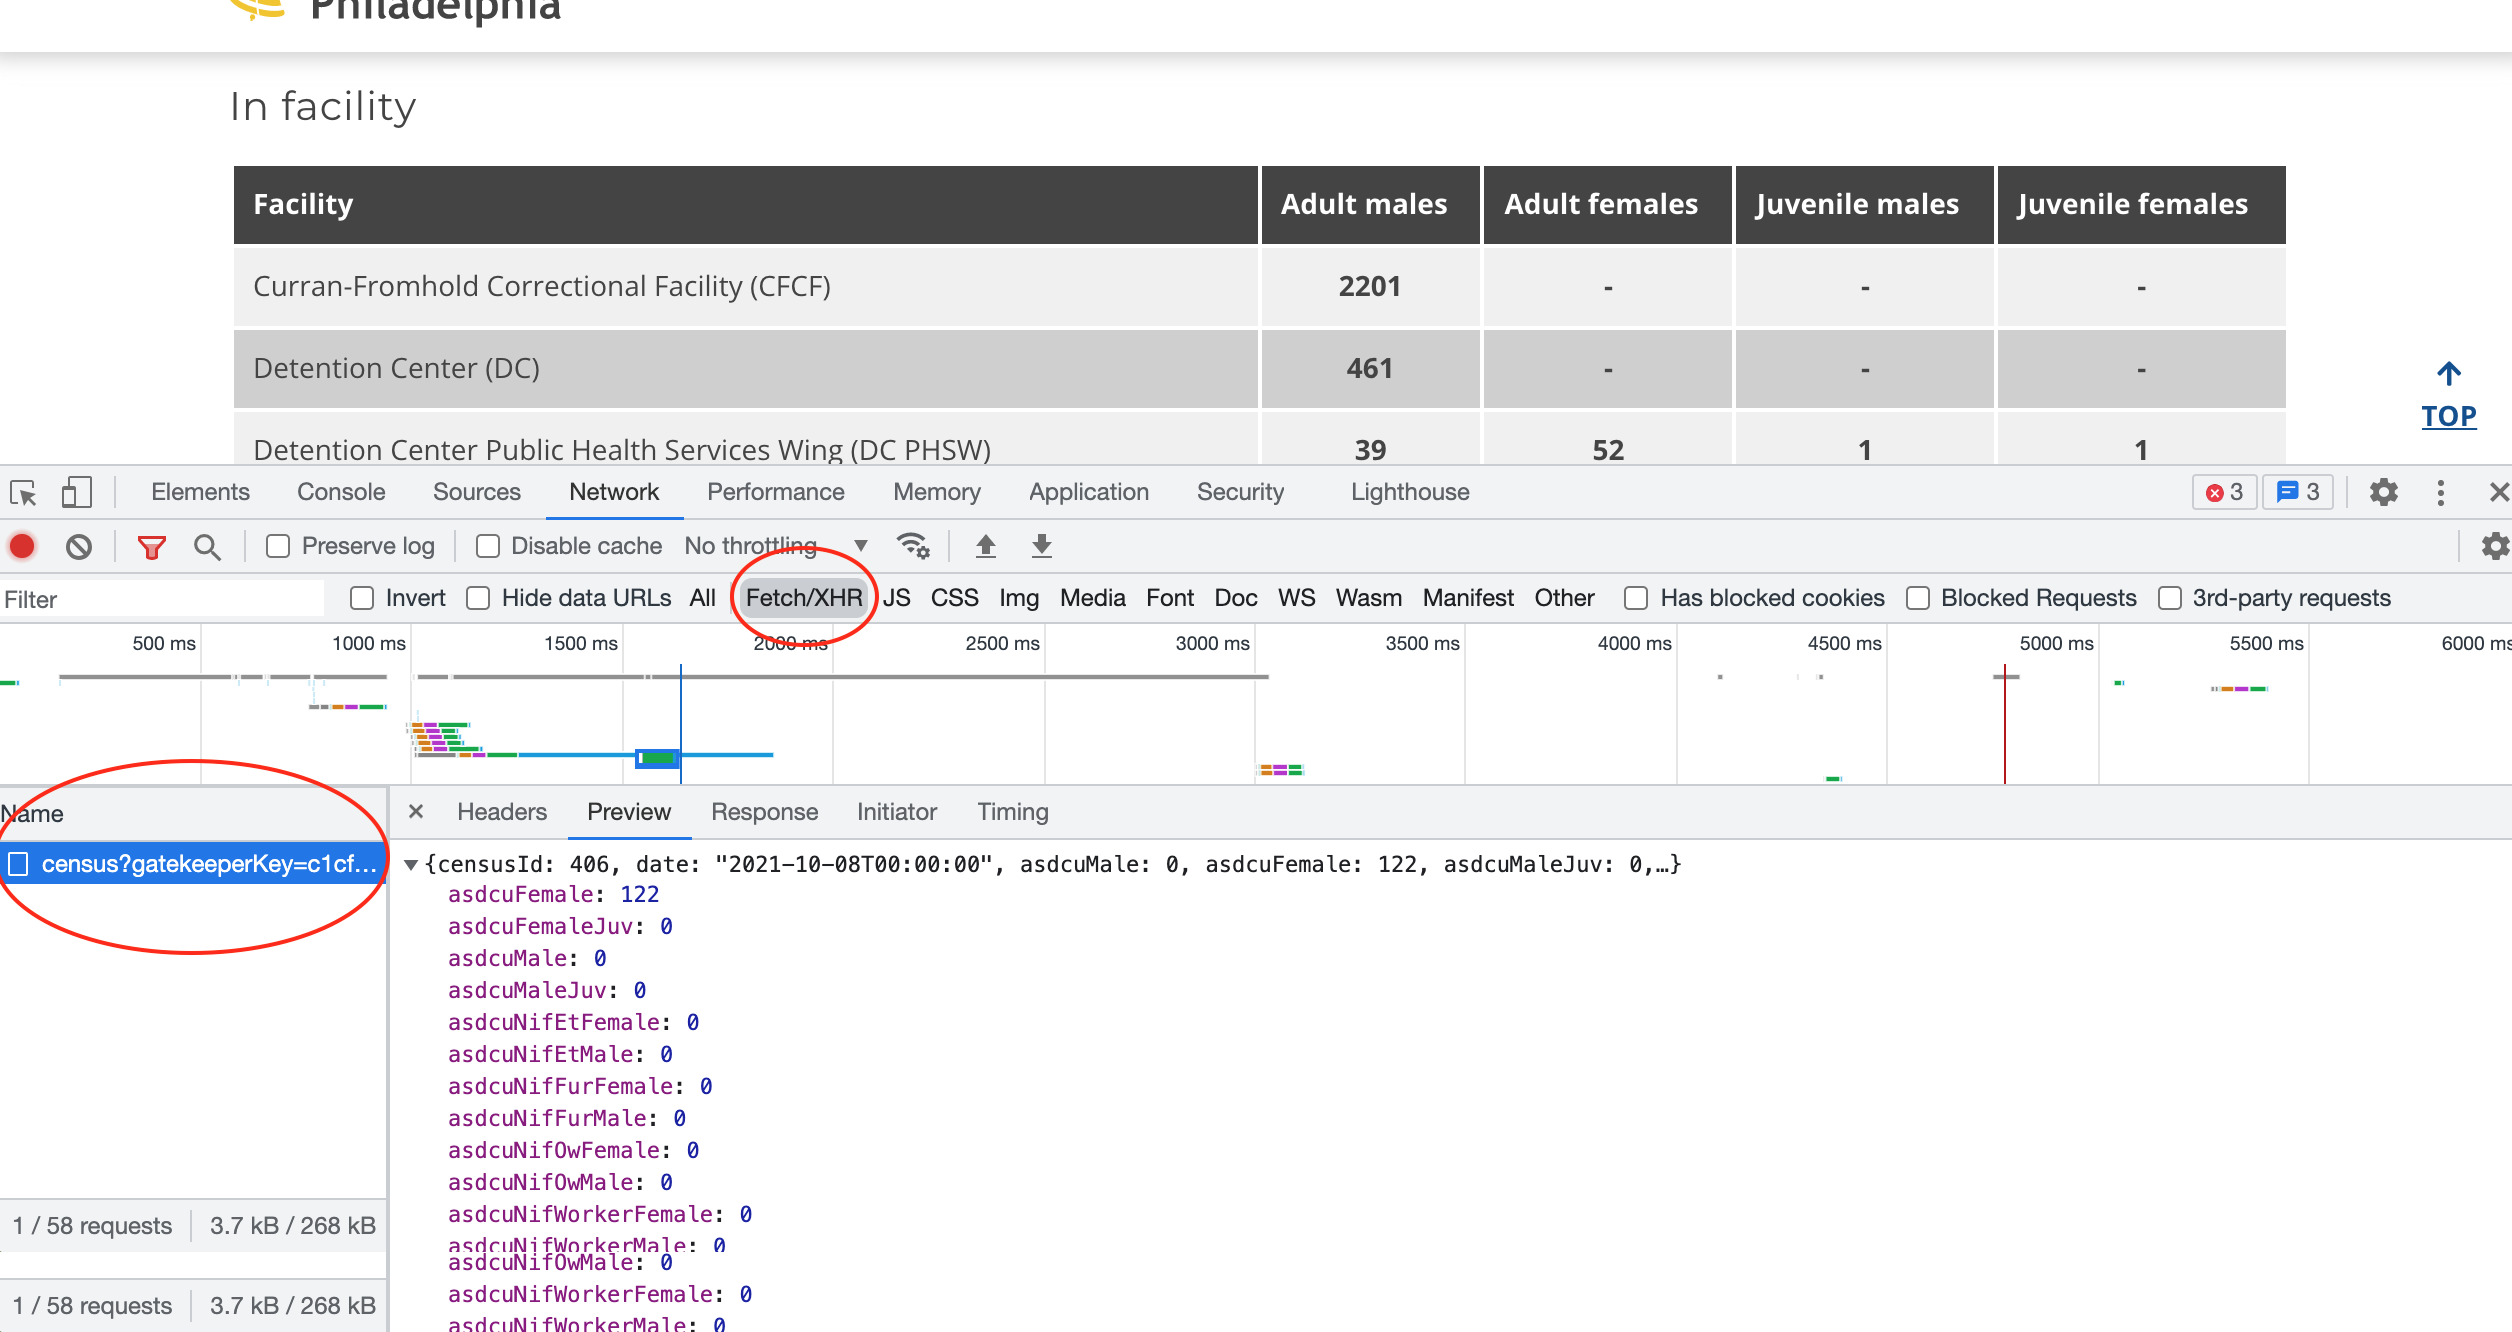

## Example 2: [Measles data from the WSJ](http://graphics.wsj.com/infectious-diseases-and-vaccines/)

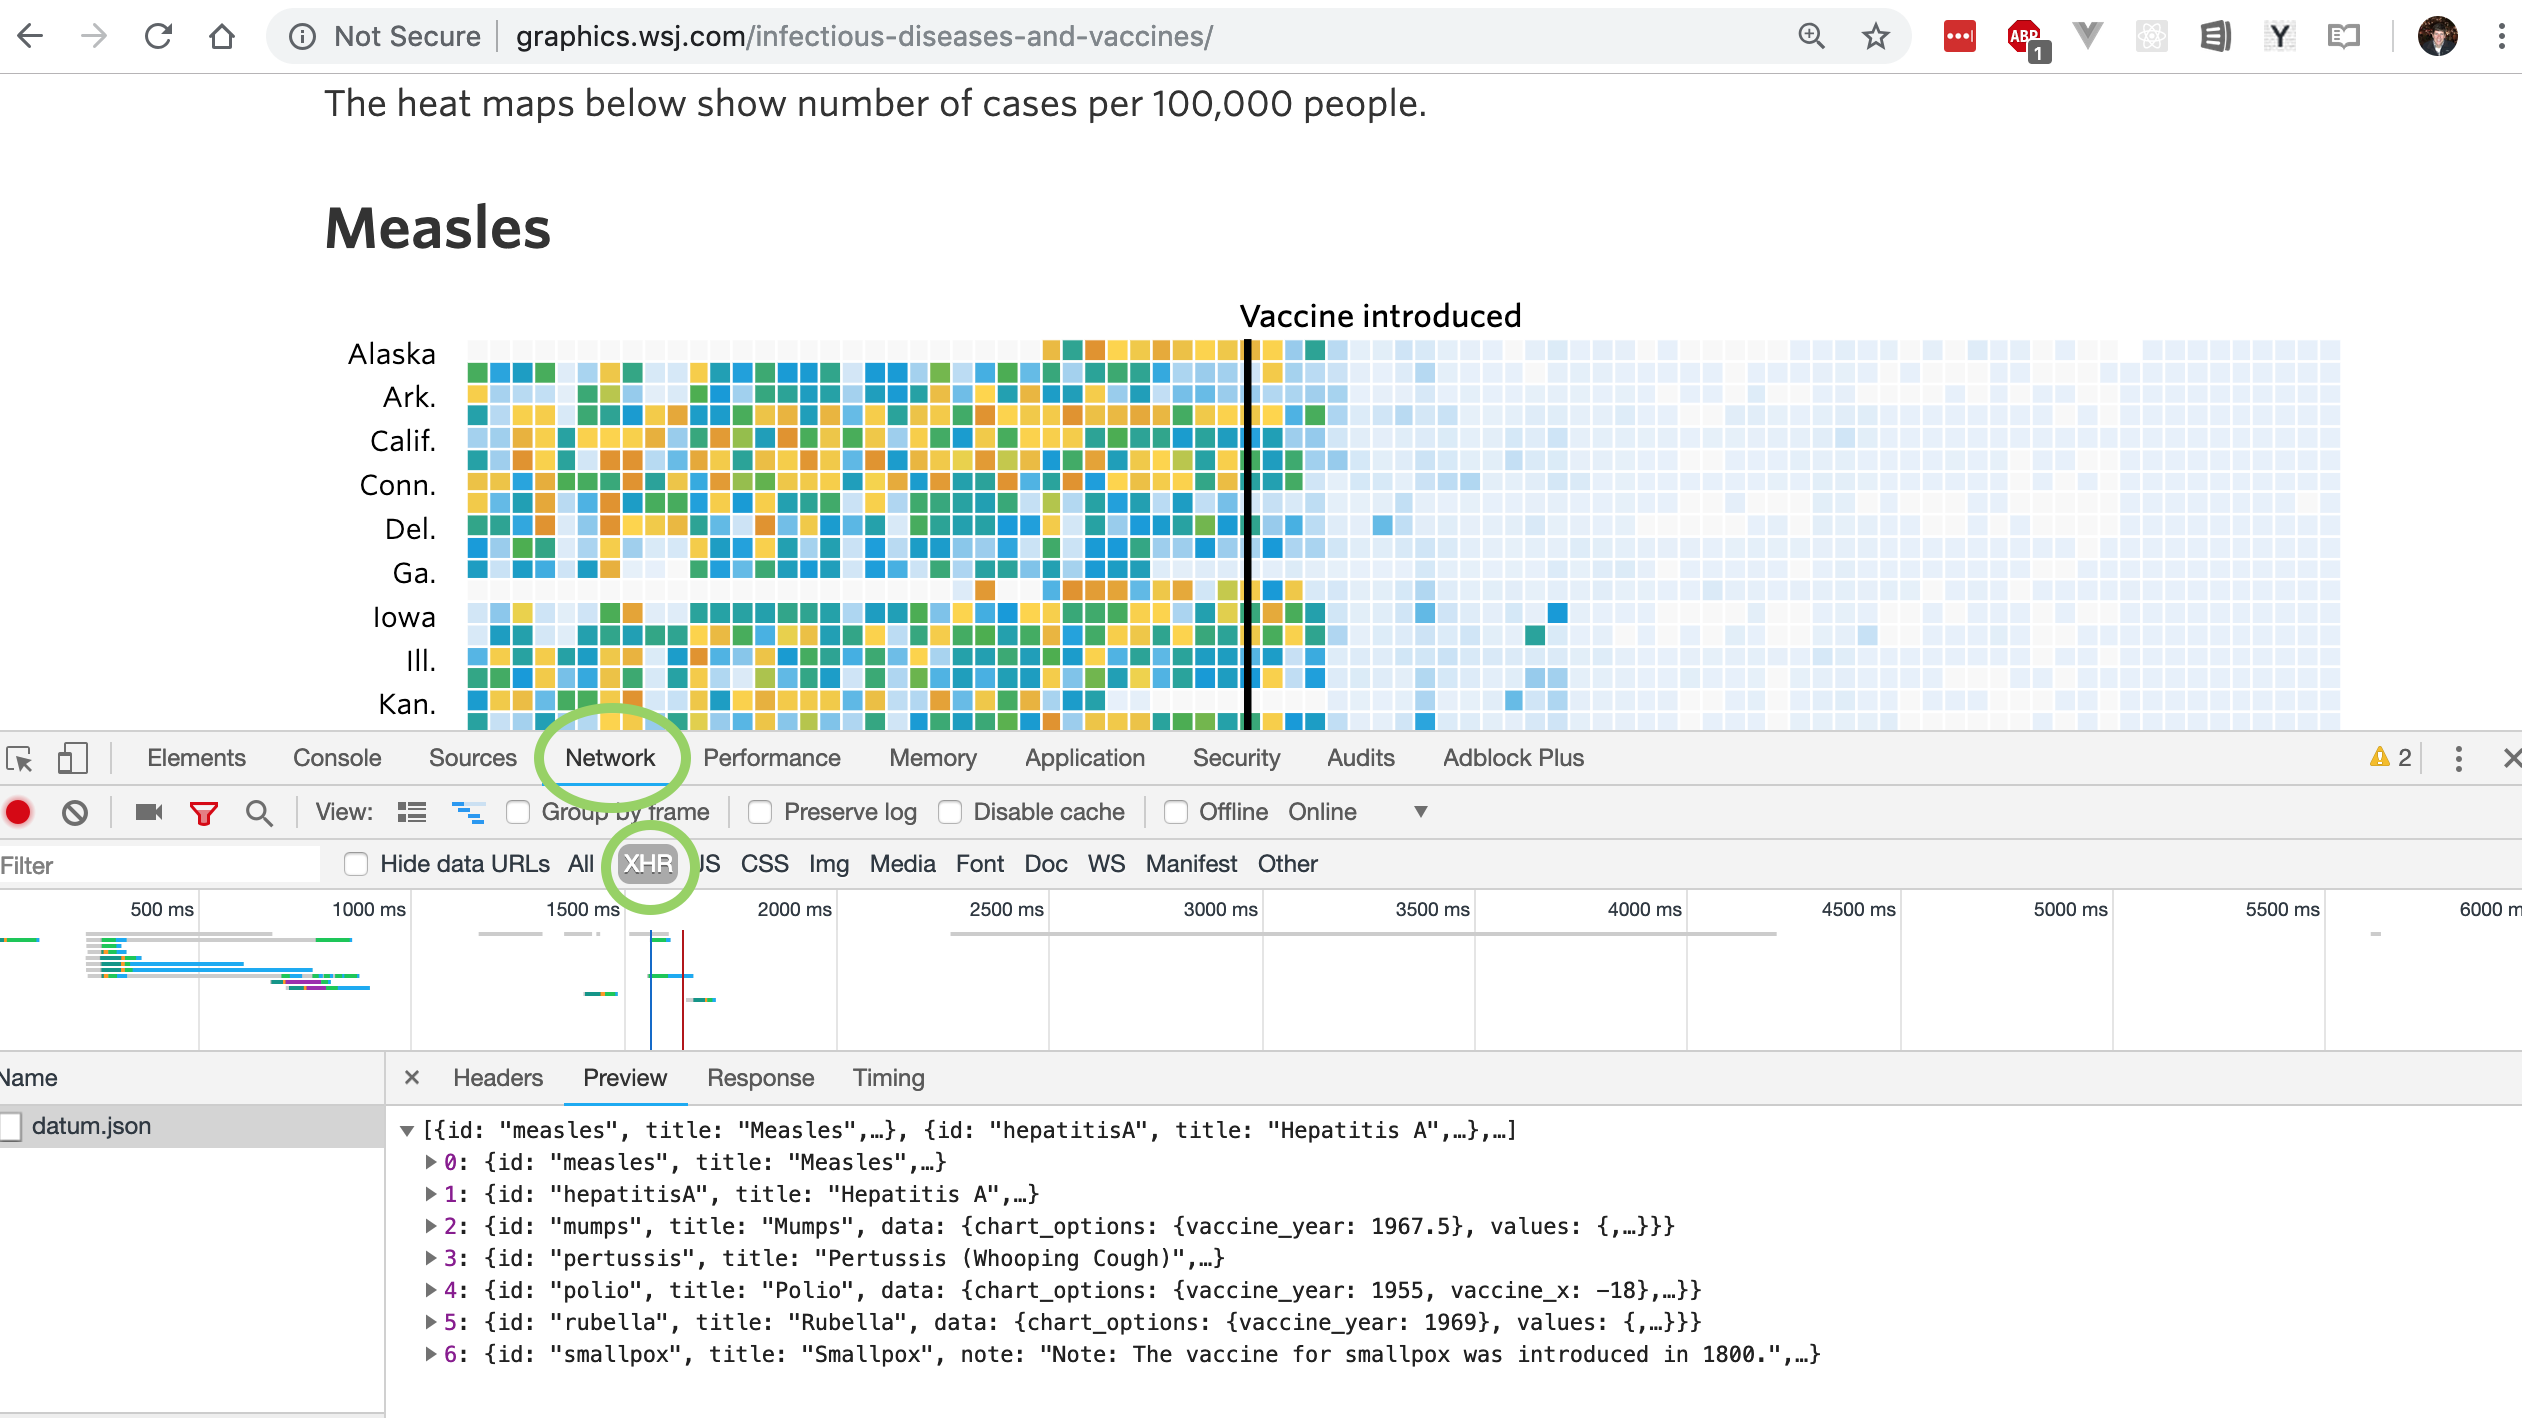

## Web scraping: when inspecting is not enough

## Web Scraping in Python

The most common packages: 

- **requests**: utilities for requesting HTML from a website
- **beautifulsoup4**: utilities for parsing HTML and extracting specific elements/data

With these packages, we can: 

- Request the HTML of web pages
- Parse HTML and extract the data we want

## Let's explore [All Sides](https://www.allsides.com/media-bias/media-bias-ratings)

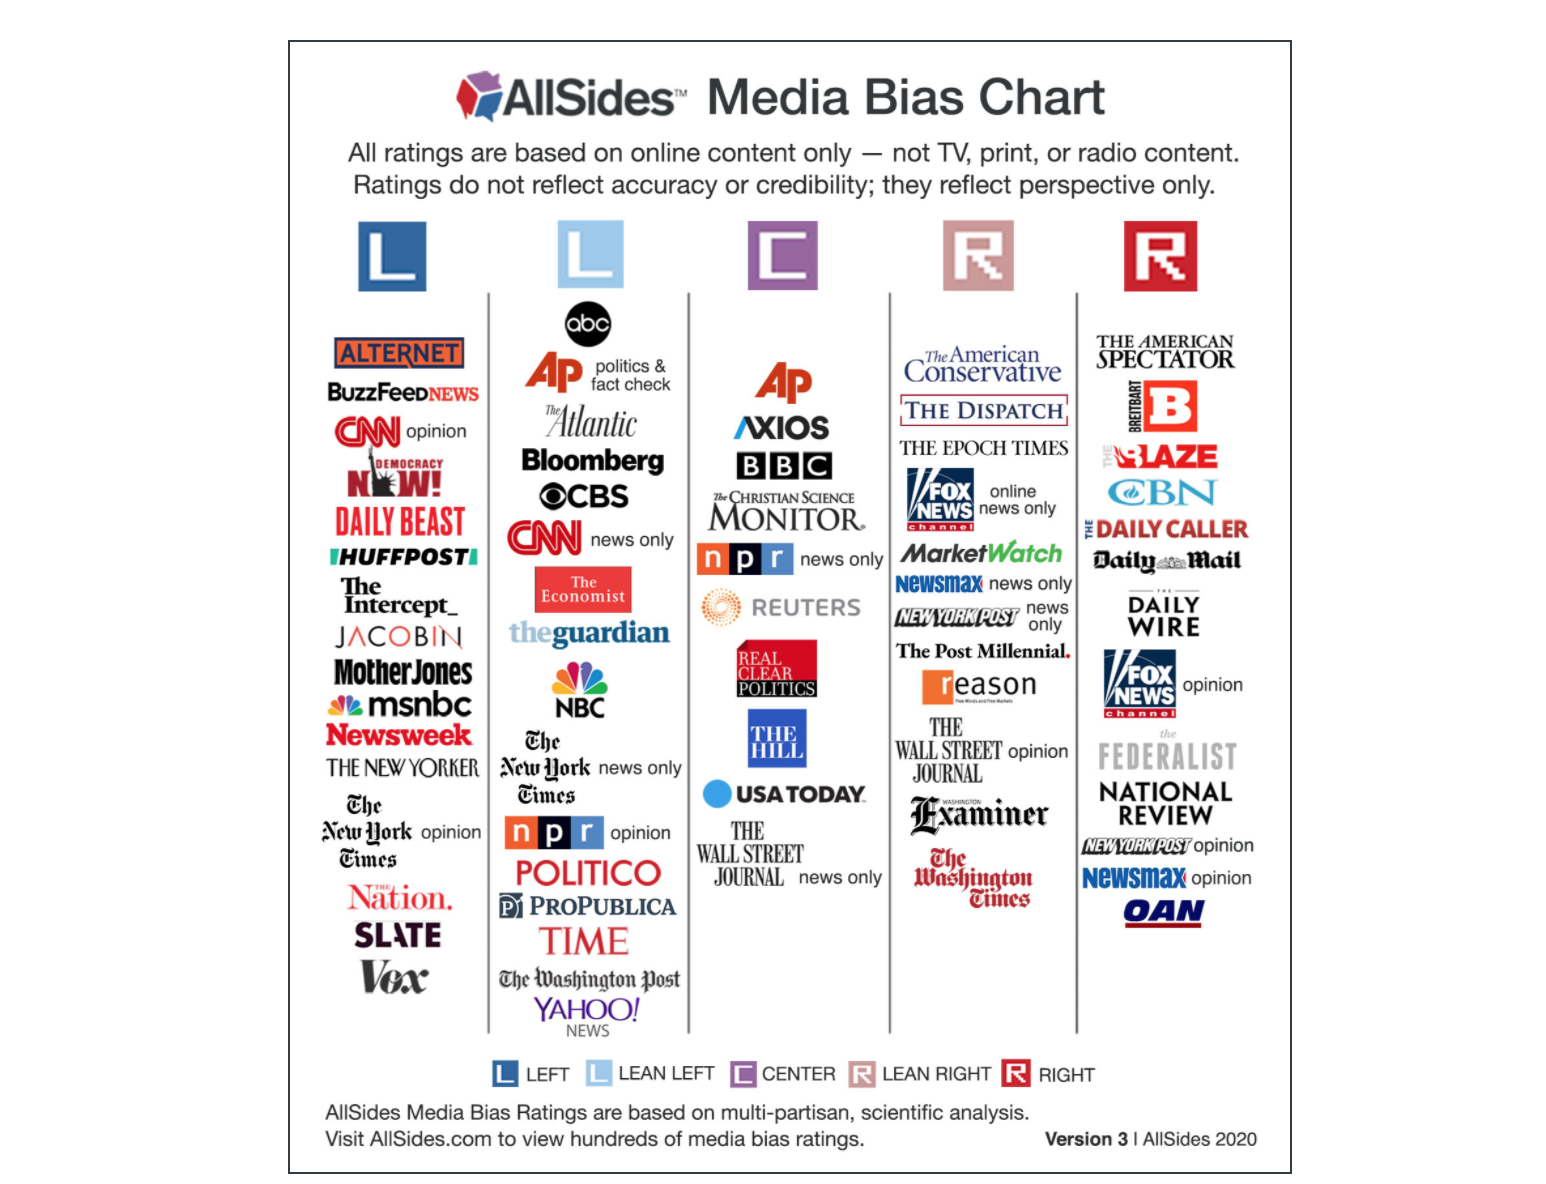

## Getting the HTML content

In [5]:
import requests

In [6]:
url = 'https://www.allsides.com/media-bias/media-bias-ratings'
r = requests.get(url)
print(r.content)

b'<!DOCTYPE html>\n<html  lang="en" dir="ltr" prefix="og: http://ogp.me/ns# content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">\n<head profile="http://www.w3.org/1999/xhtml/vocab">\n<meta charset="utf-8" />\n<link rel="shortcut icon" href="https://www.allsides.com/sites/default/files/AllSides-Icon.png" type="image/png" />\n<meta property="fb:app_id" content="555035668344688" />\n<meta name="description" content="What\xe2\x80\x99s the bias of your favorite media outlet? See over 800 AllSides media bias ratings." />\n<meta name="keywords" content="media bias ratings chart, media bias ratings allsides, news media bias ratings, media outlet bias ratings, media bias ratings website" />\n<link rel="canonical" href="https://www.allsides.com/m

## BeautifulSoup makes this much more manageable

In [7]:
from bs4 import BeautifulSoup

In [8]:
soup = BeautifulSoup(r.content, 'html.parser')

## Making the HTML "pretty"

In [9]:
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en" prefix="og: http://ogp.me/ns# content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
 <head profile="http://www.w3.org/1999/xhtml/vocab">
  <meta charset="utf-8"/>
  <link href="https://www.allsides.com/sites/default/files/AllSides-Icon.png" rel="shortcut icon" type="image/png"/>
  <meta content="555035668344688" property="fb:app_id"/>
  <meta content="What’s the bias of your favorite media outlet? See over 800 AllSides media bias ratings." name="description"/>
  <meta content="media bias ratings chart, media bias ratings allsides, news media bias ratings, media outlet bias ratings, media bias ratings website" name="keywords"/>
  <link href="https://www.allsides.com/media-bias/media-bias-ratings" 

This is what you'll see if you use the Web Inspector

## How to extract the content we want?

**Two important functions**

1. `soup.select_one(selector)`: finds the first element matching the selector query and returns **one** element
1. `soup.select(selector)`: finds **all** elements matching the selector 

**Recommended reading:** Note on beautiful soup and css selectors in [this week's repository](https://github.com/MUSA-550-Fall-2020/week-6/blob/master/css-selectors.md)

## To be continued...